# Plotting the flux space

There are different ways to visualize the space of feasible steady-state flux vectors. The two most popular plot types are production envelops and yield spaces. StrainDesign provides functions for both of these plot types, but additionally support plotting of arbitrary other projections or mappings of rate and yield terms. We again use the e_coli_core example for demonstration purposes.

In [1]:
import cobra
import straindesign as sd
model = cobra.io.load_model('e_coli_core')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-13


## Production Envelopes

Production envelopes project the solution space of steady-state flux vectors onto the dimensions of growth rate and product synthesis rate. Such a plot can be generated by:

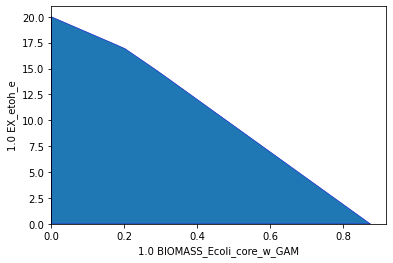

In [2]:
sd.plot_flux_space(model,('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'));

Again, arbitrary constraints can be applied to the flux space to plot subspaces. Here, we plot the flux space within a small range of oxygen uptakes ($1\text{-}2\,mmol_{0_2}g_{CDW}^{-1}h^{-1}$). This constraint reduces the maximum growth rate to a thrid, while maximum growth entails ethanol production.

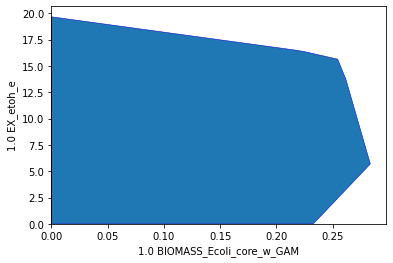

In [3]:
sd.plot_flux_space(model,('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),
                   constraints=['-EX_o2_e >= 1', '-EX_o2_e <= 2']);

It is also possible to use arbitrary linear expressions for the axis. Here, for instance, we plot the carbon recovery in the oxidized products formate, acetate and CO2 versus the reduced product ethanol. The coefficients for each product are matched with their number of carbon atoms. Glucose uptake is set to 1 (so the input equals 6 carbon atoms). The plot now shows that, stoichiometrically, at most of 4 out of 6 atoms can be directed to either side, ethanol or oxidized products. Yet, to balance redox equivalents, it is necessary, to then direct the remaining 2 carbon atoms towars the other side.

Read LP format model from file C:\Users\Philipp\AppData\Local\Temp\tmpc6h0xhvt.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros


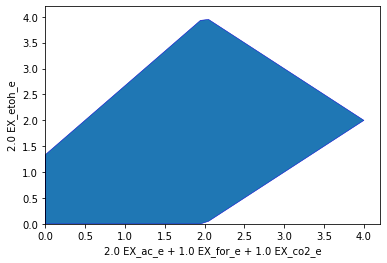

In [4]:
constraints=[
             'EX_h_e >= 0',
             'EX_co2_e >= 0',
             'EX_o2_e = 0'
             ]
model1 = model.copy()
model1.reactions.ATPM.lower_bound = 0
model1.reactions.EX_glc__D_e.lower_bound = -1
model1.reactions.EX_glc__D_e.upper_bound = -1
datapoints, triang, plot1 = sd.plot_flux_space(model1,('2 EX_ac_e + 1 EX_for_e + 1 EX_co2_e','2 EX_etoh_e'),
                                               constraints = constraints);

Notice the bump in the top edge? We may use a finer sampling grid to even out such artifacts.

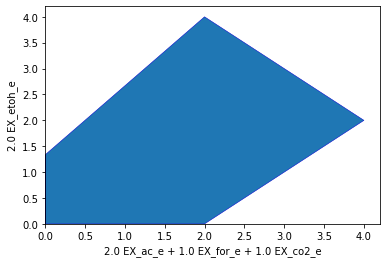

In [5]:
datapoints, triang, plot1 = sd.plot_flux_space(model1,('2 EX_ac_e + 1 EX_for_e + 1 EX_co2_e','2 EX_etoh_e'),
                                               constraints = constraints, points=55);

## Yield Spaces

The yield space plot can be used to depict the relationship between two yield terms in a metabolic networks. Here, we plot the biomass yield vs the etahnol production yield.

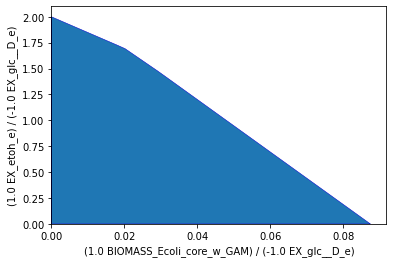

In [6]:
sd.plot_flux_space(model,(('BIOMASS_Ecoli_core_w_GAM','-EX_glc__D_e'),('EX_etoh_e','-EX_glc__D_e')));

As in this case, a yield space plots often look similar to their corresponding phase planes. However, it should be noted that yield terms are generally non-linear and, adversely to pure flux-space projections, yield spaces may therfore be non-polyhedral or even non-convex.

## Mixed Plots

The following plot uses a rate and a yield for the different axes. It shows the relationship between possible growth rates and biomass yields under limited oxygen uptake.

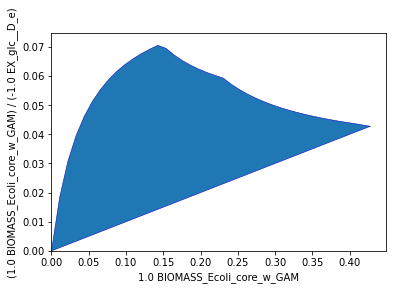

In [7]:
sd.plot_flux_space(model,('BIOMASS_Ecoli_core_w_GAM',('BIOMASS_Ecoli_core_w_GAM','-EX_glc__D_e')),
                   constraints='-EX_o2_e <= 6');

The graph shows that under limited oxygen uptake, maximum growth rate and maximum biomass yield do not coincide. As discussed in the chapter of yield optimization, overflow metabolism may be used to boost growth at the expense of biomass yield.

On a sidenote: if growth yield and growth rate could be used interchangably, we would observe a straingt diagonal line here. In the case of unlimited oxygen uptake, we observe that best yield and growth rate indeed coinside, since respiration can be fully exploited to attain the hightest possible biomass yield:

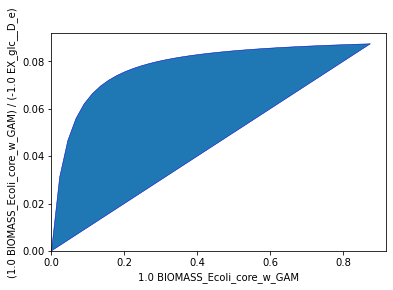

In [8]:
sd.plot_flux_space(model,('BIOMASS_Ecoli_core_w_GAM',('BIOMASS_Ecoli_core_w_GAM','-EX_glc__D_e')));

We may also use a mixed rate-yield (oxygen uptake vs biomass yield) plot to graphically determine the oxygen uptake rate needed to attain the maximum yield. Another interesting observation is the sigmoidal increas of the biomass yield with available oxygen:

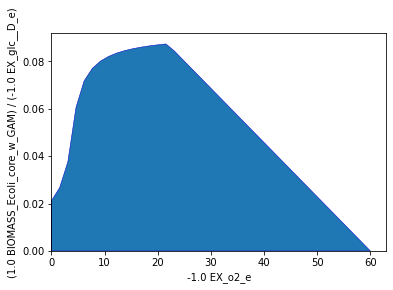

In [9]:
sd.plot_flux_space(model,('-EX_o2_e',('BIOMASS_Ecoli_core_w_GAM','-EX_glc__D_e')));

## 3D plots

A 3-dimensional plot may help tp reveil more complex relationships between fluxes and yields. In the following plot we analyze the relationship between oxygen uptake, growth rate and ethanol yield.

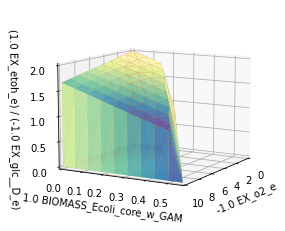

In [10]:
sd.plot_flux_space(model,('-EX_o2_e','BIOMASS_Ecoli_core_w_GAM',('EX_etoh_e','-EX_glc__D_e')),
                   constraints='-EX_o2_e <= 10',points=10);

Since a 3D-plot does not show us the angle we are looking for, we may halt plotting and use matplotlib commands to rotate the plot before the actual plotting.

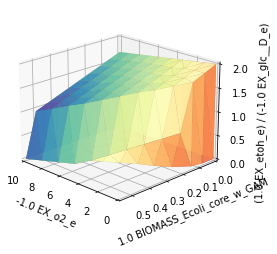

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
_,_,plot1 = sd.plot_flux_space(model,('-EX_o2_e','BIOMASS_Ecoli_core_w_GAM',('EX_etoh_e','-EX_glc__D_e')),
                   constraints='-EX_o2_e <= 10',points=10,show=False);
plot1._axes.view_init(20, 135)
plt.show()

The plot now shows that at low or no oxygen uptake, a minimum ethanol yield is guaranteed at maximum growth rates, while at higher growh rates this is not the case. The critical point seems to be reached at an oxygen uptake rate of about $7\,mmol_{0_2}g_{CDW}^{-1}h^{-1}$.

### Interactive and animated 3D plots

You may set a custom rendering option, to generate an interactive that can be rotated or a plot in a separate window. This can be done either through the IPython magic command, e.g., `%matplotlib tk`:

In [12]:
%matplotlib tk
sd.plot_flux_space(model,('-EX_o2_e','BIOMASS_Ecoli_core_w_GAM',('EX_etoh_e','-EX_glc__D_e')),
                   constraints='-EX_o2_e <= 10',points=10);

or by passing the parameter `plt_backend`:

In [13]:
sd.plot_flux_space(model,('-EX_o2_e','BIOMASS_Ecoli_core_w_GAM',('EX_etoh_e','-EX_glc__D_e')),
                   constraints='-EX_o2_e <= 10',points=10,
                   plt_backend='TkAgg');

You may also animate 3D figures and save these animations to GIFs or movie files. Please note, that the ffmpeg codec needs to be installed and available. For that matter, refer to the matplotlib reference.

In [ ]:
import matplotlib.animation as animation
from IPython import display

r1 = ('-EX_o2_e')
r2 = ('BIOMASS_Ecoli_core_w_GAM')
y3 = ('EX_etoh_e', '-EX_glc__D_e')
constraints = ['NADTRHD = 0',
               'NADH16 = 0',
               'LDH_D = 0',
               'PPC = 0']
_,_,plot2 = sd.plot_flux_space(model, (r1, r2, y3),
                           constraints=constraints,
                           points=10,
                           show=False)
# specify animation
def animate(angle):
    plot2._axes.view_init(20, angle)
    return plot2

# generate animation
ani = animation.FuncAnimation(
    plot2.figure, animate, save_count=360)

writer = animation.FFMpegWriter(
    fps=25, bitrate=1000)
ani.save("movie.gif", writer=writer)

##### Plot generation

For all plots, the term from the primary axis is minimized and maximized. The `points` parameter is used to generate a grid that is used in the maximizations and minimizations in the direction of the secondary axis. In case of a 3D plot, another grid is then generated on the first two axes and maximizations and minimizations are performed in the direction of the tertiary axis.

In 2D, the resulting polygon is then filled. In 3D, Delaunay triangles are generated to plot the surface of the shape.